### Visión por Computador. Práctica 0. Antonio Coín Castro.

In [233]:
# Librerías
import numpy as np
import cv2
from math import ceil
from matplotlib import pyplot as plt

# Ejercicio 1

Esta función lee una imagen de un fichero y la imprime en color (*flag_color = 1*) o en escala de grises (*flag_color = 0*). Además, devuelve la imagen leída.

In [253]:
def print_img(img_path, flag_color):
    # Leemos la imagen en el modo correspondiente
    img = cv2.imread(img_path, flag_color)
    
    if flag_color == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Compatibilidad con matplotlib BGR -> RGB
        plt.imshow(img)
    elif flag_color == 0:
        plt.imshow(img, cmap = 'gray')
    else:
        print("Error: flag_color debe ser 1 ó 0")
        return

    # Mostramos la imagen y la devolvemos
    plt.xticks([]), plt.yticks([])
    plt.show()
    return img

Mostramos una imagen de prueba en grises y en color:

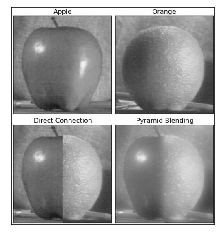

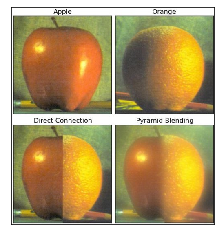

In [258]:
im1 = print_img("../img/orapple.jpg", 0)
im2 = print_img("../img/orapple.jpg", 1)

# Ejercicio 2 

Definimos una función para imprimir una matriz de números reales cualquiera (tras normalizarla).

In [236]:
def print_matrix(img, show = True):
    # Interpretar como matriz de números reales
    img = img.astype(float) 
    
    # Normalizar a [0,1] (más fácil con cv2.normalize)
    max_val = np.amax(img)
    min_val = np.amin(img)
    img = (img - min_val) / (max_val - min_val)
            
    # Mostrar correctamente en monobanda o tribanda
    if len(np.shape(img)) != 3:
        plt.imshow(img, cmap = 'gray')
    else:
        plt.imshow(img)
        
    plt.xticks([]), plt.yticks([])
    if show:
        plt.show()

Ahora podemos mostrar una matriz aleatoria como imagen (monobanda o tribanda), y también una matriz correspondiente a una imagen conocida (leída de fichero).

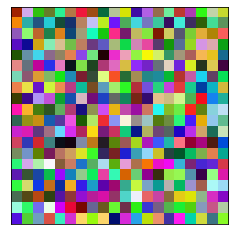

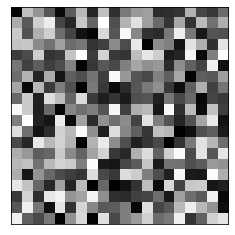

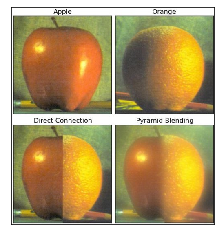

In [237]:
# Cargamos las matrices
random_img_color = 4 * np.random.rand(20, 20, 3) - 1  # Uniforme en [-1, 3) por ejemplo
random_img_gray = np.random.rand(20,20)
img = cv2.imread("../img/orapple.jpg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostramos las matrices
print_matrix(random_img_color)
print_matrix(random_img_gray)
print_matrix(img)

# Ejercicio 3

Esta función acepta una colección de imágenes y las muestra todas en el mismo *plot*. Lo hacemos de dos formas, con un *subplot* de *matplotlib* y con la concatenación (horizontal) de imágenes de *OpenCV*. En el segundo caso hay que asegurarse de que las imágenes tienen la misma altura y son del mismo tipo (todas tribanda). Se puede proporcionar un array de títulos para cada una de las imágenes.

In [245]:
# Controla si usamos subplot o concat
matplot = False

def print_multiple_img(v_img, title = ""):
    # Controlamos si se muestran títulos
    show_title = len(title) > 0
    
    if matplot:  # Matplotlib
        # Establecemos el tamaño del plot
        nrows = math.ceil(len(v_img) / 2.0)
        ncols = 2
        plt.figure(figsize = (10,10))

        # Mostramos las imágenes
        for i in range(len(v_img)):
            plt.subplot(nrows, ncols, i + 1)
            
            if show_title:
                plt.title(title[i])
            
            print_matrix(v_img[i], False)

        plt.show()
        
    else:  # OpenCV
        # Altura mínima de las imágenes
        hmin = min(img.shape[0] for img in v_img)
        
        for i in range(len(v_img)):
            if v_img[i].shape[0] > hmin: # Redimensionar a altura hmin si es necesario
                v_img[i] = cv2.resize(v_img[i], (v_img[i].shape[1], hmin))
                
            if len(v_img[i].shape) != 3: # Pasar a tribanda si es necesario
                v_img[i] = cv2.cvtColor(v_img[i], cv2.COLOR_GRAY2RGB)
                
        # Concatenar y mostrar
        plt.figure(figsize = (10 * len(v_img), hmin))
        
        if show_title:
            plt.title("  &  ".join(title), fontsize=16)
        
        print_matrix(cv2.hconcat(v_img))

Imprimimos varias imágenes a la vez (en color, blanco y negro y escala de grises):

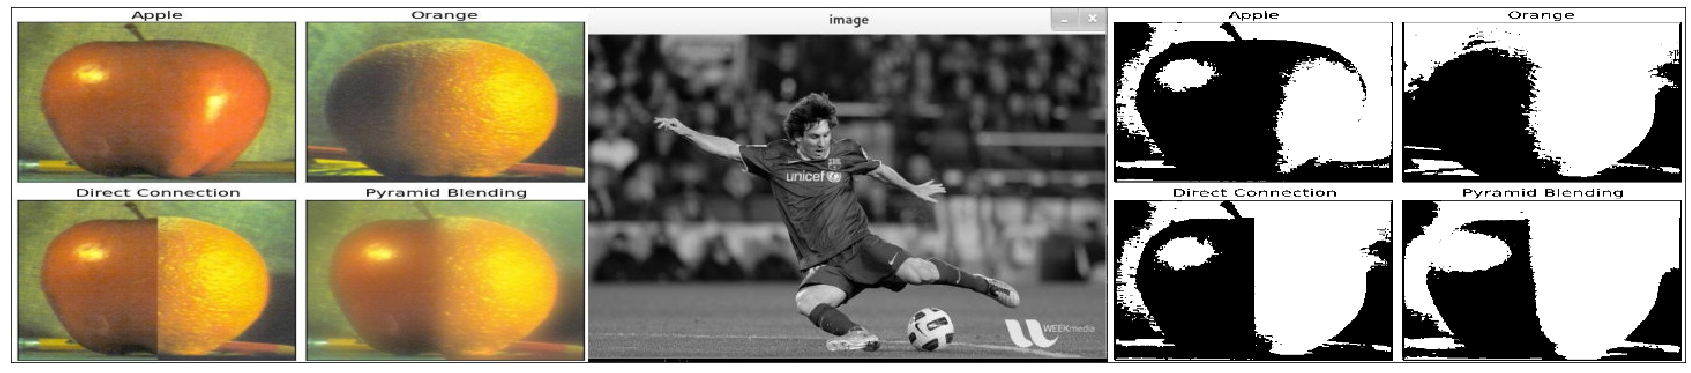

In [246]:
img_gray = cv2.imread("../img/orapple.jpg", 0)
img_bw = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)[1] # Imagen en B/W (<= 127 --> negro, > 127 --> blanco)
messi = cv2.imread("../img/messi.jpg", 0)

print_multiple_img([img, messi, img_bw])

# Ejercicio 4

Esta función modifica unos píxeles concretos de una imagen y los pone a un color especificado. Es importante notar que el píxel $(x,y)$ corresponde a la fila $y$, columna $x$. El parámetro *color* es una tupla $(R, G, B)$, y si la imagen está en escala de grises debe representar un gris, es decir, $R=G=B$.

In [247]:
def modify_pixels(img, pixels, color):
    # Establecemos el color para modificar si es gris
    if len(img.shape) != 3:
        color = color[0]
        
    for (x,y) in pixels:
        img[(y,x)] = color

Modificamos ahora algunos píxeles de unas imágenes y las mostramos.

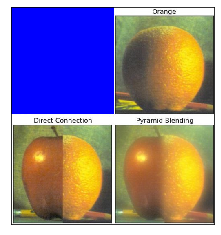

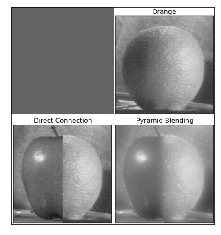

In [248]:
img2 = np.copy(img)
img3 = np.copy(img_gray)

modify_pixels(img2, [(x,y) for x in range(252) for y in range(265)], (0,0,255))
modify_pixels(img3, [(x,y) for x in range(252) for y in range(265)], (100,100,100))

print_matrix(img2)
print_matrix(img3)

# Ejercicio 5

Esta función recibe una lista de imágenes y una lista de títulos, y muestra cada imagen con su título en una misma ventana. El grueso de la implementación se encuentra integrado en la función *print_multiple_img* del ejercicio 3.

In [250]:
def show_titles(v_img, v_titles):
    print_multiple_img(v_img, v_titles)    

Finalmente imprimimos un par de imágenes con sus títulos.

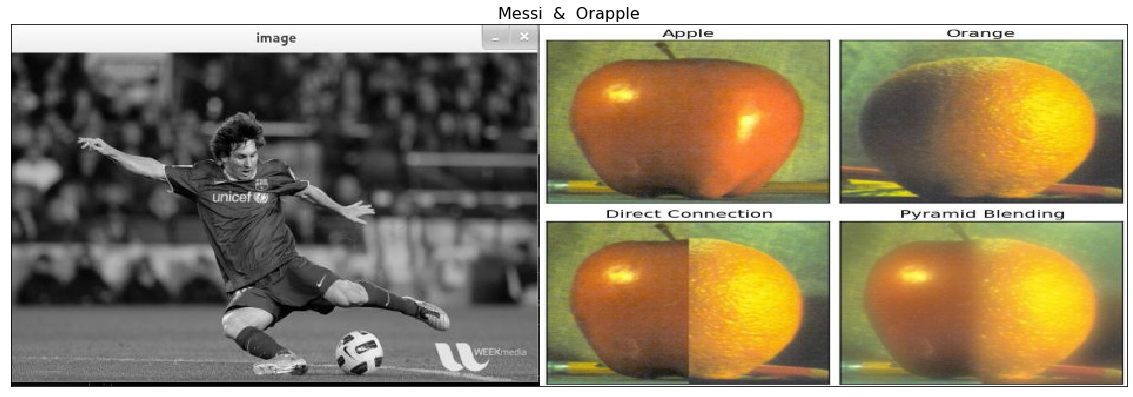

In [251]:
show_titles([messi, img], ["Messi", "Orapple"])